# Consolidating the Data

In [1]:
import pandas as pd

In [122]:
data = pd.read_csv('Data/clickbait_data.csv')

In [3]:
data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


# Pre-processing Text

Pre-processing using Natural Language Processing:
- Tokenize
- Flatten into a single list of words
- Remove stopwords
- Separate numeric characters and non-numeric characters
- Lemmatize non-numeric list of words

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taejoon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/taejoon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/taejoon/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [15]:
tokenized_data = data
for i in range(len(data)):
    tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
data['headline'][5]

'How To Flirt With Queer Girls Without Making A Total Fool Of Yourself'

In [127]:
data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [128]:
tokenized_data

,headline,clickbait
0,"[should, i, get, bings]",1
1,"[which, tv, female, friend, group, do, you, be...",1
2,"[the, new, star, wars, the, force, awakens, tr...",1
3,"[this, vine, of, new, york, on, celebrity, big...",1
4,"[a, couple, did, a, stunning, photo, shoot, wi...",1
...,...,...
31995,"[to, make, female, hearts, flutter, in, iraq, ...",0
31996,"[british, liberal, democrat, patsy, calton, 56...",0
31997,"[drone, smartphone, app, to, help, heart, atta...",0
31998,"[netanyahu, urges, pope, benedict, in, israel,...",0


In [134]:
firstwords = [tokenized_data['headline'][i][0] for i in range(len(tokenized_data))]
firstwords

['should',
 'which',
 'the',
 'this',
 'a',
 'how',
 '32',
 'if',
 'what',
 'natalie',
 '16',
 '21',
 '17',
 'does',
 'who',
 '17',
 'are',
 'the',
 'here',
 '15',
 'what',
 'zoo',
 'tell',
 '9',
 '21',
 'this',
 '8',
 'another',
 '16',
 'this',
 'when',
 'an',
 'sarah',
 'which',
 'a',
 '29',
 '13',
 'we',
 '23',
 'we',
 'grimes',
 'this',
 'the',
 '17',
 'how',
 'we',
 'guys',
 '22',
 'the',
 'this',
 'here',
 'ed',
 'what',
 'take',
 'are',
 '18',
 '27',
 'how',
 'which',
 '25',
 'literally',
 '58',
 '17',
 'do',
 'which',
 '29',
 'this',
 'request',
 'issa',
 'how',
 'you',
 'no',
 'this',
 '18',
 'we',
 'charli',
 'if',
 '13',
 'will',
 '28',
 '19',
 'here',
 'this',
 'i',
 '24',
 'country',
 '17',
 'the',
 'this',
 '42',
 'this',
 '22',
 'are',
 'which',
 'how',
 'how',
 '12',
 'what',
 '23',
 'there',
 'we',
 '17',
 'here',
 'can',
 '21',
 'which',
 'anna',
 'people',
 'are',
 'do',
 'we',
 '21',
 'a',
 'be',
 'we',
 '18',
 '19',
 '20',
 '21',
 'will',
 'mark',
 'nobody',
 'are'

In [135]:
# Find frequency of each word in a string in Python 
# using dictionary. 
   
def count(elements): 
    # check if each word has '.' at its last. If so then ignore '.' 
    if elements[-1] == '.': 
        elements = elements[0:len(elements) - 1] 
   
    # if there exists a key as "elements" then simply 
    # increase its value. 
    if elements in dictionary: 
        dictionary[elements] += 1
   
    # if the dictionary does not have the key as "elements"  
    # then create a key "elements" and assign its value to 1. 
    else: 
        dictionary.update({elements: 1}) 
   
   
# driver input to check the program. 
   
Sentence = "Apple Mango Orange Mango Guava Guava Mango"
   
# Declare a dictionary 
dictionary = {} 
   
# split all the word of the string. 
lst = Sentence.split() 
   
# take each word from lst and pass it to the method count. 
for elements in lst: 
    count(elements) 
    
# print the keys and its corresponding values. 
for allKeys in dictionary: 
    print ("Frequency of ", allKeys, end = " ") 
    print (":", end = " ") 
    print (dictionary[allKeys], end = " ") 
    print()

Frequency of  Apple : 1 
Frequency of  Mango : 3 
Frequency of  Orange : 1 
Frequency of  Guava : 2 


In [139]:
dictionary = {}
for words in firstwords:
    count(words)
dictionary

{'should': 40,
 'which': 754,
 'the': 748,
 'this': 1075,
 'a': 456,
 'how': 571,
 '32': 47,
 'if': 138,
 'what': 671,
 'natalie': 6,
 '16': 244,
 '21': 622,
 '17': 649,
 'does': 10,
 'who': 98,
 'are': 264,
 'here': 456,
 '15': 333,
 'zoo': 2,
 'tell': 55,
 '9': 105,
 '8': 60,
 'another': 19,
 'when': 104,
 'an': 83,
 'sarah': 9,
 '29': 127,
 '13': 239,
 'we': 547,
 '23': 353,
 'grimes': 1,
 'guys': 13,
 '22': 258,
 'ed': 8,
 'take': 17,
 '18': 345,
 '27': 200,
 '25': 149,
 'literally': 19,
 '58': 2,
 'do': 149,
 'request': 2,
 'issa': 1,
 'you': 96,
 'no': 59,
 'charli': 1,
 'will': 15,
 '28': 60,
 '19': 561,
 'i': 138,
 '24': 214,
 'country': 1,
 '42': 17,
 '12': 152,
 'there': 46,
 'can': 499,
 'anna': 4,
 'people': 138,
 'be': 1,
 '20': 103,
 'mark': 13,
 'nobody': 2,
 'someone': 24,
 'gay': 15,
 'try': 12,
 'would': 28,
 'for': 128,
 '14': 158,
 '11': 168,
 'mumbai': 4,
 '10': 95,
 'beans': 1,
 'only': 18,
 'these': 261,
 'dear': 16,
 'amber': 6,
 'adele': 17,
 '31': 103,
 'oscar

In [138]:
### Data contains no punctuation! Should you analyze for questions?

In [18]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [ ]:
list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['headline'])

In [58]:
flat_clickbait = [item for sublist in list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['headline']) for item in sublist]

In [61]:
clean_flat_cb = []
for w in flat_clickbait:
    if w not in stop_words:
        clean_flat_cb.append(w)

In [65]:
len(flat_clickbait), len(clean_flat_cb)

(164293, 97306)

In [88]:
num_in_cb = [i for i in clean_flat_cb if i.isdigit()]

In [94]:
numbers = set(num_in_cb)

In [95]:
nonnum_in_cb = [i for i in clean_flat_cb if i not in numbers]

In [97]:
cb_nn_fdist = FreqDist(nonnum_in_cb)

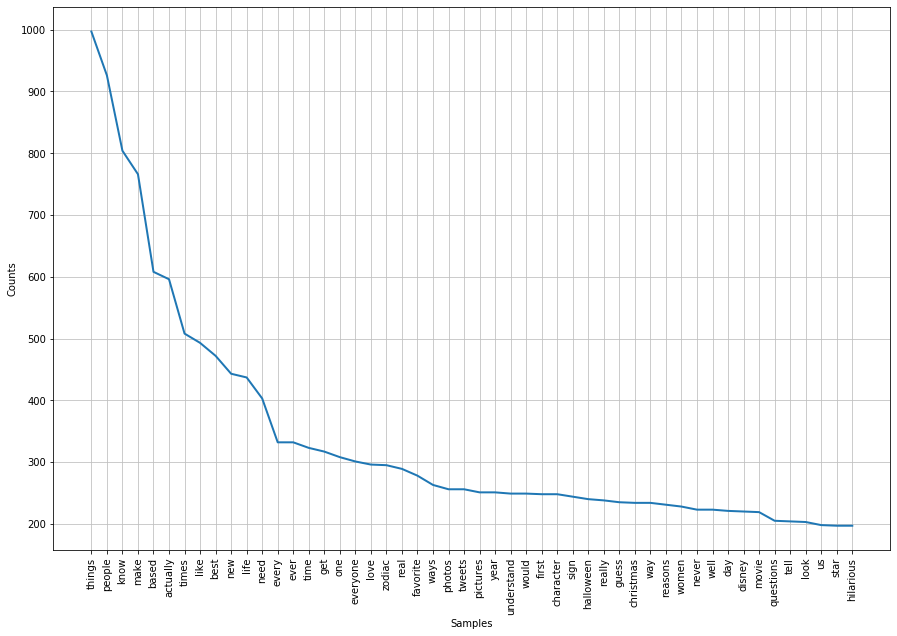

In [102]:
plt.figure(figsize=(15,10))
cb_nn_fdist.plot(50)

In [105]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [106]:
lemmatized_cb_nn=[]
for w in nonnum_in_cb:
    lemmatized_cb_nn.append(lemmatizer.lemmatize(w))

In [108]:
lemmatized_cb_nn_fdist = FreqDist(lemmatized_cb_nn)

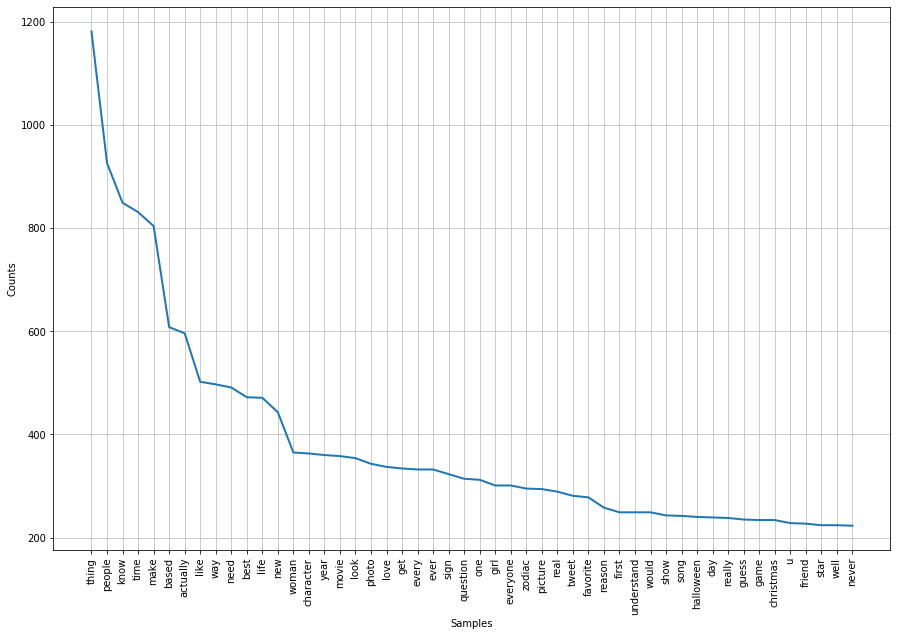

In [110]:
plt.figure(figsize=(15,10))
lemmatized_cb_nn_fdist.plot(50)

In [66]:
from nltk.probability import FreqDist

In [67]:
fdist = FreqDist(clean_flat_cb)

In [73]:
fdist.keys()

dict_keys(['get', 'bings', 'tv', 'female', 'friend', 'group', 'belong', 'new', 'star', 'wars', 'force', 'awakens', 'trailer', 'give', 'chills', 'vine', 'york', 'celebrity', 'big', 'brother', 'fucking', 'perfect', 'couple', 'stunning', 'photo', 'shoot', 'baby', 'learning', 'inoperable', 'brain', 'tumor', 'flirt', 'queer', 'girls', 'without', 'making', 'total', 'fool', '32', 'cute', 'things', 'distract', 'awkward', 'thanksgiving', 'disney', 'princesses', 'florida', 'quote', 'lyric', 'best', 'describes', 'depression', 'natalie', 'dormer', 'sam', 'claflin', 'play', 'game', 'see', 'actually', 'last', 'hunger', 'games', '16', 'responses', 'indian', 'patriarchy', '21', 'times', 'died', 'captain', 'america', 'civil', 'war', 'teaser', '17', 'kourtney', 'kardashian', 'shut', 'family', 'coffee', 'make', 'poop', 'ex', 'based', 'zodiac', 'hairdresser', 'struggles', 'every', 'black', 'girl', 'knows', 'true', 'walter', 'white', 'heisenberg', 'canadian', 'groom', 'ever', 'left', 'wedding', 'plow', 'gu

In [80]:
res = [i for i in fdist.keys() if i.isdigit()]
res

['32',
 '16',
 '21',
 '17',
 '15',
 '2016',
 '9',
 '8',
 '10',
 '6',
 '25',
 '29',
 '13',
 '23',
 '2015',
 '22',
 '100',
 '18',
 '27',
 '46',
 '58',
 '28',
 '19',
 '24',
 '42',
 '12',
 '20',
 '14',
 '11',
 '5',
 '1996',
 '31',
 '2',
 '7',
 '3',
 '2006',
 '33',
 '1955',
 '95',
 '4',
 '65',
 '51',
 '34',
 '80',
 '26',
 '38',
 '50',
 '53',
 '30',
 '36',
 '1915',
 '1',
 '37',
 '0',
 '93',
 '39',
 '108',
 '35',
 '40',
 '60',
 '41',
 '168',
 '500',
 '76',
 '2014',
 '72',
 '1989',
 '2019',
 '43',
 '2005',
 '48',
 '00',
 '45',
 '2008',
 '62',
 '49',
 '2003',
 '47',
 '2002',
 '89',
 '57',
 '55',
 '000',
 '44',
 '70',
 '2007',
 '59',
 '1995',
 '92',
 '90',
 '106',
 '61',
 '1994',
 '2018',
 '165',
 '69',
 '900',
 '101',
 '99',
 '90210',
 '2020',
 '103',
 '2010',
 '2009',
 '54',
 '98',
 '400',
 '2001',
 '78',
 '87',
 '82',
 '105',
 '56',
 '1983',
 '2011',
 '75',
 '155',
 '1975',
 '2017',
 '2004',
 '79',
 '495',
 '2024',
 '237',
 '1502',
 '2032',
 '300',
 '71',
 '97',
 '64',
 '85',
 '1921',
 '679',

In [82]:
cb_num_dist = {key: fdist[key] for key in res}

In [83]:
cb_num_dist

{'32': 49,
 '16': 256,
 '21': 645,
 '17': 676,
 '15': 350,
 '2016': 174,
 '9': 117,
 '8': 81,
 '10': 142,
 '6': 44,
 '25': 175,
 '29': 131,
 '13': 237,
 '23': 371,
 '2015': 506,
 '22': 268,
 '100': 58,
 '18': 353,
 '27': 212,
 '46': 7,
 '58': 3,
 '28': 65,
 '19': 583,
 '24': 226,
 '42': 20,
 '12': 172,
 '20': 125,
 '14': 169,
 '11': 177,
 '5': 71,
 '1996': 2,
 '31': 108,
 '2': 42,
 '7': 122,
 '3': 43,
 '2006': 13,
 '33': 45,
 '1955': 1,
 '95': 3,
 '4': 30,
 '65': 3,
 '51': 6,
 '34': 35,
 '80': 4,
 '26': 137,
 '38': 12,
 '50': 24,
 '53': 5,
 '30': 69,
 '36': 19,
 '1915': 1,
 '1': 33,
 '37': 25,
 '0': 2,
 '93': 1,
 '39': 26,
 '108': 1,
 '35': 22,
 '40': 13,
 '60': 4,
 '41': 17,
 '168': 1,
 '500': 6,
 '76': 3,
 '2014': 3,
 '72': 1,
 '1989': 16,
 '2019': 1,
 '43': 18,
 '2005': 12,
 '48': 8,
 '00': 2,
 '45': 11,
 '2008': 3,
 '62': 5,
 '49': 5,
 '2003': 1,
 '47': 8,
 '2002': 1,
 '89': 4,
 '57': 5,
 '55': 6,
 '000': 12,
 '44': 14,
 '70': 6,
 '2007': 7,
 '59': 7,
 '1995': 2,
 '92': 3,
 '90': 3

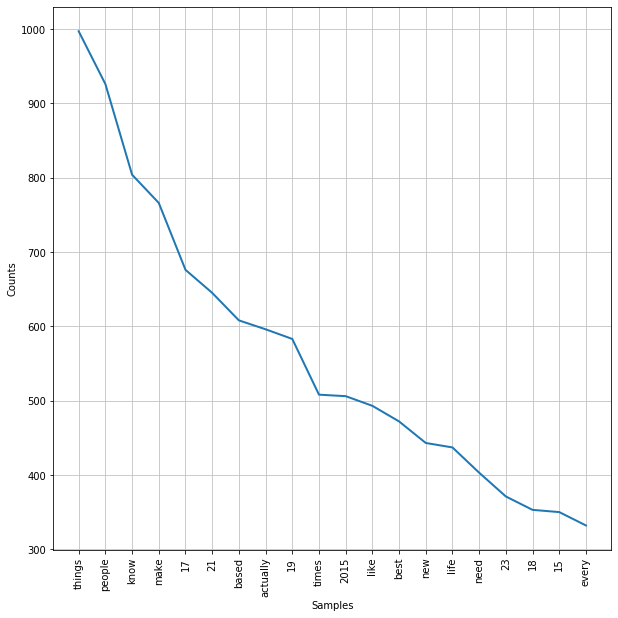

In [69]:
plt.figure(figsize=(10,10))
fdist.plot(20)

In [84]:
# making dictionary of non-digit words
new_dict = {key:val for key, val in fdist.items() if key != res} 

# Feature Engineering

Possible Features to include are:
- startswith() ===> numeric character
- contains ===> numbers, ?, !, ..., etc.
- number of words
- sentiment?
- part of speech

In [4]:
data['headline'] = data['headline'].apply(lambda x: x.lower())

In [5]:
data

,headline,clickbait
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,"the new ""star wars: the force awakens"" trailer...",1
3,"this vine of new york on ""celebrity big brothe...",1
4,a couple did a stunning photo shoot with their...,1
...,...,...
31995,"to make female hearts flutter in iraq, throw a...",0
31996,"british liberal democrat patsy calton, 56, die...",0
31997,drone smartphone app to help heart attack vict...,0
31998,"netanyahu urges pope benedict, in israel, to d...",0


# EDA

In [142]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp36-cp36m-macosx_10_7_x86_64.whl size=159774 sha256=e5586f9e0f364b8067d50598b08da900eaf3470f32a75c8e7e2e73e1473e8dd1
  Stored in directory: /Users/taejoon/Library/Caches/pip/wheels/09/7a/57/49f0c5fb0d6aaee90cb8c2d13d09a909a7b0ce42f8805fe69a
Successfully built wordcloud


In [143]:
from wordcloud import WordCloud

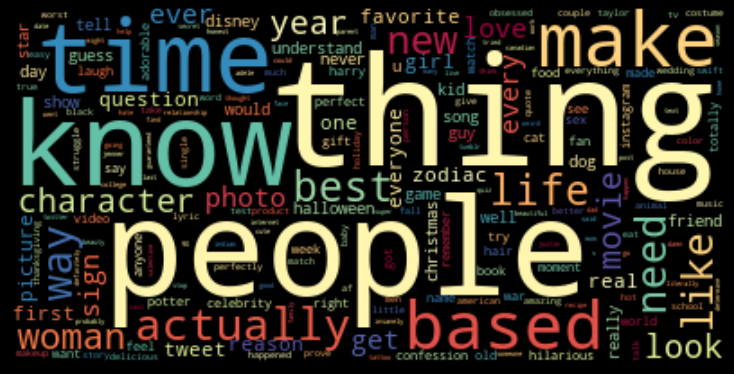

In [144]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(lemmatized_cb_nn_fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

In [ ]:
# PLOT FEATURES
# create separate lists for keys and values

# Modelling

In [145]:
from sklearn.model_selection import train_test_split

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [157]:
data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [159]:
preprocessed_data = data
preprocessed_data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [ ]:
# tokenized_data = data
# for i in range(len(data)):
#     tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [164]:
data['headline']
preprocessed_data = [tokenizer.tokenize(list(data['headline'])[i]) for i in range(len(data))]
preprocessed_data
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

# tokenized_review = tokenizer.tokenize(review)

[['Should', 'I', 'Get', 'Bings'],
 ['Which', 'TV', 'Female', 'Friend', 'Group', 'Do', 'You', 'Belong', 'In'],
 ['The',
  'New',
  'Star',
  'Wars',
  'The',
  'Force',
  'Awakens',
  'Trailer',
  'Is',
  'Here',
  'To',
  'Give',
  'You',
  'Chills'],
 ['This',
  'Vine',
  'Of',
  'New',
  'York',
  'On',
  'Celebrity',
  'Big',
  'Brother',
  'Is',
  'Fucking',
  'Perfect'],
 ['A',
  'Couple',
  'Did',
  'A',
  'Stunning',
  'Photo',
  'Shoot',
  'With',
  'Their',
  'Baby',
  'After',
  'Learning',
  'She',
  'Had',
  'An',
  'Inoperable',
  'Brain',
  'Tumor'],
 ['How',
  'To',
  'Flirt',
  'With',
  'Queer',
  'Girls',
  'Without',
  'Making',
  'A',
  'Total',
  'Fool',
  'Of',
  'Yourself'],
 ['32',
  'Cute',
  'Things',
  'To',
  'Distract',
  'From',
  'Your',
  'Awkward',
  'Thanksgiving'],
 ['If', 'Disney', 'Princesses', 'Were', 'From', 'Florida'],
 ['What',
  's',
  'A',
  'Quote',
  'Or',
  'Lyric',
  'That',
  'Best',
  'Describes',
  'Your',
  'Depression'],
 ['Natalie',


In [172]:
tokenizer.tokenize(data['headline'][0])

['Should', 'I', 'Get', 'Bings']

In [170]:
data.apply(tokenizer.tokenize(lambda x: x))

TypeError: expected string or bytes-like object

In [ ]:
def tokenize(text):
    text = [word_tokenize(x) for x in text]
    return text

df.text = tokenize(df.text)

stopwords_list = stopwords.words('english')
df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [148]:
tokenized_data

,headline,clickbait
0,"[should, i, get, bings]",1
1,"[which, tv, female, friend, group, do, you, be...",1
2,"[the, new, star, wars, the, force, awakens, tr...",1
3,"[this, vine, of, new, york, on, celebrity, big...",1
4,"[a, couple, did, a, stunning, photo, shoot, wi...",1
...,...,...
31995,"[to, make, female, hearts, flutter, in, iraq, ...",0
31996,"[british, liberal, democrat, patsy, calton, 56...",0
31997,"[drone, smartphone, app, to, help, heart, atta...",0
31998,"[netanyahu, urges, pope, benedict, in, israel,...",0


In [183]:
' '.join(X_train)

'should i get bings'

In [185]:
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['clickbait'], random_state=0)

tfidf = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2))

tfidf_text_train = tfidf.fit_transform(X_train)
tfidf_text_test = tfidf.transform(X_test)

In [190]:
tfidf_text_train

<24000x119045 sparse matrix of type '<class 'numpy.float64'>'
	with 274770 stored elements in Compressed Sparse Row format>

In [191]:
y_train

6848     1
17747    0
25807    0
30292    0
12804    1
        ..
13123    1
19648    0
9845     1
10799    1
2732     1
Name: clickbait, Length: 24000, dtype: int64

In [187]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score

In [211]:
recall_score(y_test, nb_test_preds)

0.9708396178984414

In [212]:
f1_score(y_test, nb_test_preds)

0.9642946317103621

In [188]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds)

In [192]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(tfidf_text_train, y_train)

nb_train_preds = nb_classifier.predict(tfidf_text_train)
nb_test_preds = nb_classifier.predict(tfidf_text_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.99925, ' Training Recall:', 0.998835371433325)
('Testing Accuracy:', 0.96425, ' Testing Recall:', 0.9708396178984414)


In [196]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

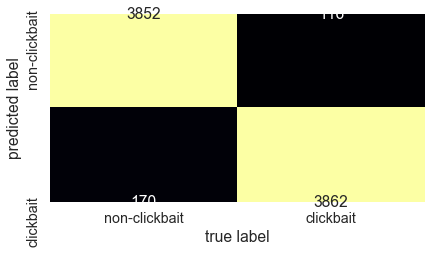

In [197]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig('nbcm5')
plt.show();

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced' )
rf_classifier.fit(tfidf_text_train, y_train)

rf_test_preds = rf_classifier.predict(tfidf_text_test)
rf_train_preds = rf_classifier.predict(tfidf_text_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.91925, ' Testing Recall:', 0.9436902966314731)


In [200]:
from sklearn import svm
from sklearn.svm import LinearSVC

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.959625, ' Testing Recall:', 0.9582704876822524)


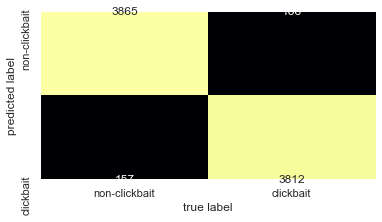

In [201]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(tfidf_text_train, y_train)

svm_test_preds = svm_classifier.predict(tfidf_text_test)
svm_train_preds = svm_classifier.predict(tfidf_text_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.9595, ' Testing Recall:', 0.9572649572649573)


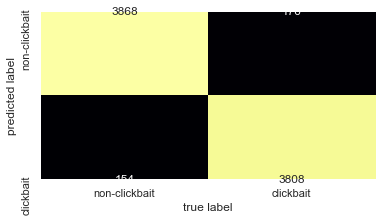

In [202]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(tfidf_text_train, y_train)

lr_train_preds = lr.predict(tfidf_text_train)
lr_test_preds = lr.predict(tfidf_text_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [204]:
tfidf_text_train

<24000x119045 sparse matrix of type '<class 'numpy.float64'>'
	with 274770 stored elements in Compressed Sparse Row format>

In [207]:
!pip install xgboost

In [209]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

D_train = xgb.DMatrix(tfidf_text_train, label=y_train)
D_test = xgb.DMatrix(tfidf_text_test, label=y_test)

xgb_clf.train(D_train)
xgb_test_preds = xgb_clf.predict(D_test)
xgb_train_preds = xgb_clf.predict(D_train)

#print(train_results(lr_train_preds))
print(test_results(xgb_test_preds))
print(train_results(xgb_train_preds))
#confusion matrix on test set xgboost Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, xgb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

AttributeError: dlsym(0x7ffd09a09170, XGDMatrixSetStrFeatureInfo): symbol not found

In [214]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

     |████████████████████████████████| 12.5 MB 2.0 MB/s eta 0:00:01    |██████████████████▎             | 7.1 MB 2.1 MB/s eta 0:00:03
     |████████████████████████████████| 5.8 MB 1.3 MB/s eta 0:00:01     |█████████████████████▉          | 3.9 MB 1.3 MB/s eta 0:00:02
     |████████████████████████████████| 106 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 8.7 MB/s eta 0:00:01     |██████████████████████▋         | 768 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 972 kB/s eta 0:00:011
     |████████████████████████████████| 450 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 113 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 2.5 MB/s eta 0:00:01
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7664 sha256=27e600ffa2beda77170c50d586f

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [215]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

In [216]:
nlp = spacy.load('en_core_web_sm')

In [219]:
spacy_data = data

In [225]:
spacy_data = data['headline'].progress_apply(lambda x: nlp(x))

100%|██████████| 32000/32000 [09:57<00:00, 53.54it/s]


In [226]:
spacy_df = pd.DataFrame(np.vstack([x.vector for x in spacy_data]))

In [227]:
spacy_df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.619160,0.238275,0.207878,0.332520,0.068529,-0.002476,0.247256,-0.561357,-0.887903,-0.583510,...,-0.232081,-0.566768,-0.287457,-0.705064,-0.339335,-0.079585,-0.506194,-0.003350,0.255920,-0.440038
1,0.885881,0.445881,-0.099544,0.190988,-0.220179,-0.061194,-0.368475,-0.120062,-0.425491,-0.538841,...,0.130190,0.106317,-0.763512,-0.084081,-0.579466,-0.084134,-0.326590,-0.199125,0.113380,-0.183575
2,0.604398,0.178751,0.110229,-0.367033,0.191473,-0.362458,-0.083587,0.313490,-0.114698,-0.227117,...,0.050865,-0.309747,-0.233715,0.123476,-0.312937,-0.142225,0.196180,-0.277443,-0.074969,-0.305888
3,0.472618,0.430577,-0.182295,-0.383954,-0.021899,-0.070171,-0.549747,0.000571,-0.037904,-0.214312,...,0.034591,-0.006743,-0.505111,-0.293417,0.016930,0.064811,0.380474,-0.516262,0.289861,-0.053947
4,0.916873,0.264209,-0.013883,-0.117717,0.254742,-0.357860,-0.438410,0.078873,-0.143598,-0.784463,...,-0.203028,-0.126204,-0.422444,-0.376210,-0.399495,-0.232817,-0.059622,-0.118952,0.375431,-0.040757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.571000,0.281344,-0.355505,-0.472212,0.505919,0.065512,-0.018464,0.319203,0.074641,-0.693205,...,-0.019289,-0.272121,-0.299138,-0.048776,-0.488893,-0.150054,0.146855,-0.079769,0.168545,0.159719
31996,0.798169,0.271027,0.148429,-0.476074,0.176909,-0.192806,-0.414980,0.483626,0.030437,-0.413444,...,-0.330626,-0.285160,-0.363570,-0.838256,-0.345571,0.060965,0.667216,-0.106562,0.387042,0.315637
31997,0.596248,0.040391,-0.360311,0.074824,0.343544,0.473389,-0.251040,0.457787,0.275768,-0.312461,...,-0.435526,-0.192343,-0.037768,-0.271065,-0.672261,-0.001655,-0.380279,-0.031058,0.250685,-0.075680
31998,0.788325,0.469086,-0.313825,-0.418777,0.274468,-0.427032,0.111337,0.106520,-0.142727,-0.696617,...,-0.325399,-0.027262,-0.294841,-0.187829,-0.818508,0.200579,0.224525,-0.248736,-0.083607,-0.112625


In [ ]:
[w.pos_ for w in first_spacy]

In [231]:
tfidf_text_train

<24000x119045 sparse matrix of type '<class 'numpy.float64'>'
	with 274770 stored elements in Compressed Sparse Row format>

In [232]:
from scipy import sparse

In [234]:
sp_X_train, sp_X_test = train_test_split(spacy_df, random_state=0)
sp_tfidf_text_train = sparse.hstack([tfidf_text_train, sp_X_train]).tocsr()
sp_tfidf_text_test = sparse.hstack([tfidf_text_test, sp_X_test]).tocsr()

In [235]:
spacy_nb_classifier = MultinomialNB(alpha = .05)

spacy_nb_classifier.fit(sp_tfidf_text_train, y_train)

spacy_nb_train_preds = nb_classifier.predict(sp_tfidf_text_train)
spacy_nb_test_preds = nb_classifier.predict(sp_tfidf_text_test)

print(train_results(spacy_nb_train_preds))
print(test_results(spacy_nb_test_preds))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
# Cannot use negative values for Naive Bayes, so use for SVM

In [239]:
sp_tfidf_text_train

<24000x119141 sparse matrix of type '<class 'numpy.float64'>'
	with 2578770 stored elements in Compressed Sparse Row format>

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.98725, ' Testing Recall:', 0.9899446958270488)


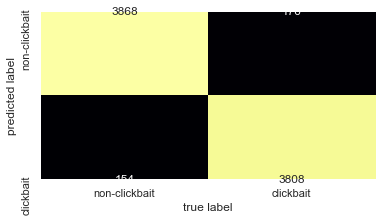

In [240]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
spacy_svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

spacy_svm_classifier.fit(sp_tfidf_text_train, y_train)

spacy_svm_test_preds = spacy_svm_classifier.predict(sp_tfidf_text_test)
spacy_svm_train_preds = spacy_svm_classifier.predict(sp_tfidf_text_train)

print(train_results(spacy_svm_train_preds))
print(test_results(spacy_svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc_sp = confusion_matrix(y_test, spacy_svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');